## 2c. Calculate open-system degassing path

## Setting things up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe). 

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

During open-system degassing, vapor is lost from the system as soon as it is formed such that the bulk composition of the system changes continuously.

We'll run a short one first as a test:

In [2]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'H2O': 1., # wt%
           'CO2ppm': 50., # ppm
           'STppm': 100, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.195}

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

Running open-system calculations requires changing the "gassing_style" to "open".
We'll use default options for everything else.

In [3]:
# choose the options I want - everything else will use the default options
my_models = [['gassing_style','open']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

Because the vapor is being removed at each pressure-step, the pressure step-size does matter. 
The smaller the step-size, the more true to pure open-system degassing the results will be but the longer it will take.
The automatic step size is 1 bar.

In [4]:
degas = vf.calc_gassing(my_analysis, models=my_models)

The following composition is analysis Sari15-04-33 from Brounce et al. (2014), with a temperature chosen as 1200 'C. We can also run the closed-system calculations for comparison and plot them: open-system degassing is the solid black curve, whereas closed-system degassing is the dotted black curve.

In [5]:
# Define the melt composition, fO2 estimate, and T as a dictionary.
my_analysis = {'Sample':'Sari15-04-33',
           'T_C': 1200., # Temperature in 'C
           'SiO2': 47.89, # wt%
           'TiO2': 0.75, # wt%
           'Al2O3': 16.74, # wt%
           'FeOT': 9.43, # wt%
           'MnO': 0.18, # wt%
           'MgO': 5.92, # wt%
           'CaO': 11.58, # wt%
           'Na2O': 2.14, # wt%
           'K2O': 0.63, # wt%
           'P2O5': 0.17, # wt%
           'H2O': 4.17, # wt%
           'CO2ppm': 1487., # ppm
           'STppm': 1343.5, # ppm
           'Xppm': 0., # ppm
           'Fe3FeT': 0.195}

# Turn the dictionary into a pandas dataframe, setting the index to 0.
my_analysis = pd.DataFrame(my_analysis, index=[0])

# choose the options I want - everything else will use the default options
my_models = [['gassing_style','open']]

# turn to dataframe with correct column headers and indexes    
my_models = vf.make_df_and_add_model_defaults(my_models)

degas1 = vf.calc_gassing(my_analysis, models=my_models)

In [6]:
# closed-system degassing calculation
degas2 = vf.calc_gassing(my_analysis)

(4000.0, 0.0)

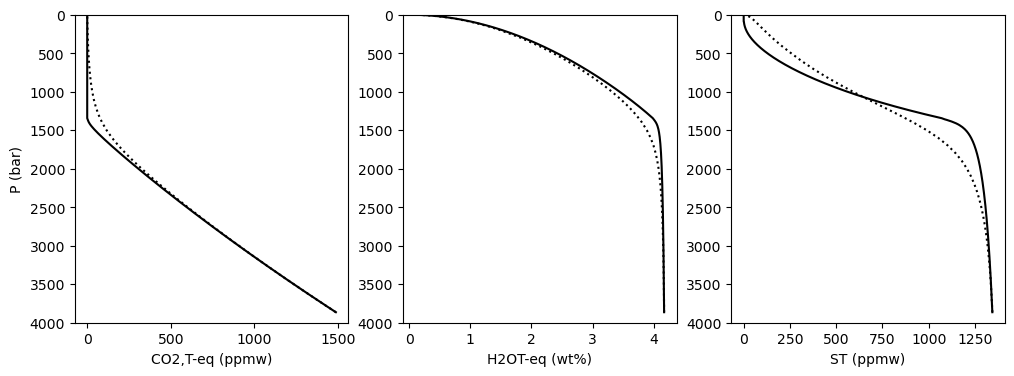

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

data1 = degas1 # open-system
data2 = degas2 # closed-system

# Plotting results
ax1.plot(data1['CO2T-eq_ppmw'], data1['P_bar'], '-k')
ax1.plot(data2['CO2T-eq_ppmw'], data2['P_bar'], ':k')
ax2.plot(data1['H2OT-eq_wtpc'], data1['P_bar'], '-k')
ax2.plot(data2['H2OT-eq_wtpc'], data2['P_bar'], ':k')
ax3.plot(data1['ST_ppmw'], data1['P_bar'], '-k')
ax3.plot(data2['ST_ppmw'], data2['P_bar'], ':k')

ax1.set_ylabel('P (bar)')
ax1.set_xlabel('CO2,T-eq (ppmw)')
ax2.set_xlabel('H2OT-eq (wt%)')
ax3.set_xlabel('ST (ppmw)')
ax1.set_ylim([4000,0])
ax2.set_ylim([4000,0])
ax3.set_ylim([4000,0])